In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### Read the Dataset

In [5]:
df_raw = pd.read_csv("../data/web_trust.csv",index_col=0)
print("shape:",df_raw.shape)
df_raw.head()

shape: (5691, 49)


document_id                                                URL  \
0      2199424                      http://unemployment.ohio.gov/   
1      2199427  http://www.law.cornell.edu/wex/unemployment_co...   
2      2547110                    http://kiem-tv.com/?q=node/4395   
3      2547112  http://www.sciencedaily.com/releases/2012/09/1...   
4      2547113  http://articles.timesofindia.indiatimes.com/20...   

   Credibility_rating  ad_count  ad_max_size  css_definitions  page_rank  \
0            3.714286       0.0          0.0            106.0        6.0   
1            4.428571       4.0      75000.0           1824.0        5.0   
2            4.000000       0.0          0.0             18.0        2.0   
3            4.833333       9.0      75000.0            383.0        3.0   
4            3.888889       2.0      75000.0            599.0        3.0   

   bitly_clicks  bitly_referrers  tweets  delicious_bookmarks  fb_clicks  \
0           9.0              5.0    22.0                 23.0        0.0   
1          12.0              1.0     1.0                  0.0        0.0   
2           0.0              0.0     5.0                  0.0        0.0   
3          45.0              9.0   100.0                  2.0        0.0   
4           3.0              3.0     7.0                  0.0        0.0   

   fb_comments  fb_likes  fb_shares  fb_total  alexa_linksin  alexa_rank  \
0         10.0      12.0       62.0      84.0           68.0      6137.0   
1          0.0       0.0        0.0       0.0         9098.0      2661.0   
2          0.0       0.0        2.0       2.0          185.0    809409.0   
3         17.0      35.0      113.0     165.0        50939.0      2549.0   
4          1.0       3.0        3.0       7.0         1250.0       132.0   

   commas   dots  exclamations  questions  spelling_errors  text_complexity  \
0   101.0  114.0           1.0        0.0             98.0         6.543833   
1    15.0   23.0           0.0        0.0              2.0         3.813895   
2    19.0   18.0           0.0        1.0             26.0         3.163160   
3    19.0   20.0           0.0        0.0             15.0         3.727098   
4    19.0   17.0           0.0        0.0             16.0         3.357533   

        smog            category     JJ     NN     DT     VB    RB  num_ne  \
0  15.903189   computer_internet  121.0  938.0  184.0  338.0  52.0     7.0   
1  15.903189            business   35.0  168.0   59.0   71.0   5.0     4.0   
2  11.208143              health   18.0  100.0   23.0   52.0  11.0     5.0   
3  14.554593              health   39.0  156.0   46.0   67.0  21.0     8.0   
4  14.554593  science_technology   32.0  112.0   39.0   57.0   8.0     6.0   

   sum_ne document_url_y   X1   X2   X3   X4   X5   X9  Total      Leik  \
0    29.0            gov  0.0  1.0  2.0  2.0  2.0  0.0    7.0  0.571429   
1    17.0            edu  0.0  0.0  1.0  2.0  4.0  0.0    7.0  0.714286   
2    20.0            com  0.0  0.0  2.0  3.0  2.0  0.0    7.0  0.714286   
3    24.0            com  0.0  0.0  0.0  1.0  5.0  0.0    6.0  0.916667   
4    10.0            com  0.0  0.0  3.0  4.0  2.0  0.0    9.0  0.722222   

       Eijk    Tastle  Leik 3 4 6  correction resp_HNC Controversial  \
0  0.357143  0.613196    0.542857         0.0        2             U   
1  0.714286  0.735143    0.600000         0.0        3             U   
2  0.571429  0.762836    0.657143         0.0        2             U   
3  0.916667  0.892660    0.866667         0.0        3             U   
4  0.611111  0.756750    0.688889         0.0        2             U   

   troia_label  
0          3.0  
1          5.0  
2          4.0  
3          5.0  
4          4.0

#### Inference: There are 5,691 rows and 49 columns in the raw data set

### Check the Column datatypes

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5691 entries, 0 to 5690
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   document_id          5691 non-null   int64  
 1   URL                  5691 non-null   object 
 2   Credibility_rating   5691 non-null   float64
 3   ad_count             5642 non-null   float64
 4   ad_max_size          5642 non-null   float64
 5   css_definitions      5662 non-null   float64
 6   page_rank            5687 non-null   float64
 7   bitly_clicks         5684 non-null   float64
 8   bitly_referrers      5684 non-null   float64
 9   tweets               5687 non-null   float64
 10  delicious_bookmarks  5662 non-null   float64
 11  fb_clicks            5680 non-null   float64
 12  fb_comments          5680 non-null   float64
 13  fb_likes             5680 non-null   float64
 14  fb_shares            5680 non-null   float64
 15  fb_total             5462 non-null   f

#### Inference: Looking at the information above we can see there are null values in some of the columns , also some of the columns we don't need for predicting the creditbility score.

### Delete the columns not needed for Analysis

In [7]:
'''
cols_not_required = ['document_id','URL',"num_ne","sum_ne","fb_total",'X1',"X2","X3","X4","X5","X9",
                     "Total","Leik","Eijk","Tastle","Leik 3 4 6","correction","resp_HNC","troia_label"]
'''

'\ncols_not_required = [\'document_id\',\'URL\',"num_ne","sum_ne","fb_total",\'X1\',"X2","X3","X4","X5","X9",\n                     "Total","Leik","Eijk","Tastle","Leik 3 4 6","correction","resp_HNC","troia_label"]\n'

In [8]:
cols_not_required = ['document_id','URL','X1',"X2","X3","X4","X5","X9","Total","Tastle","Leik 3 4 6","troia_label","num_ne","sum_ne","Eijk","Leik","ad_count","ad_max_size","fb_total","css_definitions","category","delicious_bookmarks","fb_comments","fb_shares","fb_clicks",'page_rank', 'bitly_clicks', 'bitly_referrers',
       'tweets', 'fb_likes', 'alexa_linksin','correction', 'resp_HNC', 'Controversial']

In [9]:
# make a copy of the raw data
df_main = df_raw.copy()

In [10]:
df_main.drop(cols_not_required,axis=1,inplace=True)
df_main.head()

Credibility_rating  alexa_rank  commas   dots  exclamations  questions  \
0            3.714286      6137.0   101.0  114.0           1.0        0.0   
1            4.428571      2661.0    15.0   23.0           0.0        0.0   
2            4.000000    809409.0    19.0   18.0           0.0        1.0   
3            4.833333      2549.0    19.0   20.0           0.0        0.0   
4            3.888889       132.0    19.0   17.0           0.0        0.0   

   spelling_errors  text_complexity       smog     JJ     NN     DT     VB  \
0             98.0         6.543833  15.903189  121.0  938.0  184.0  338.0   
1              2.0         3.813895  15.903189   35.0  168.0   59.0   71.0   
2             26.0         3.163160  11.208143   18.0  100.0   23.0   52.0   
3             15.0         3.727098  14.554593   39.0  156.0   46.0   67.0   
4             16.0         3.357533  14.554593   32.0  112.0   39.0   57.0   

     RB document_url_y  
0  52.0            gov  
1   5.0            edu  
2  11.0            com  
3  21.0            com  
4   8.0            com

In [11]:
df_main.columns


Index(['Credibility_rating', 'alexa_rank', 'commas', 'dots', 'exclamations',
       'questions', 'spelling_errors', 'text_complexity', 'smog', 'JJ', 'NN',
       'DT', 'VB', 'RB', 'document_url_y'],
      dtype='object')

### Handling the missing values

In [12]:
cat_cols = df_main.select_dtypes(include=object).columns.tolist()

In [13]:
cat_cols

['document_url_y']

In [14]:
df_plot = df_main.drop(cat_cols, axis=1)

In [15]:
df_plot.shape

(5691, 14)

In [16]:
df_plot1 = df_plot.iloc[:,:20]
df_plot1.shape

(5691, 14)

In [17]:
df_plot.corr().T

Credibility_rating  alexa_rank    commas      dots  \
Credibility_rating            1.000000   -0.071330  0.039471  0.006723   
alexa_rank                   -0.071330    1.000000 -0.021903 -0.020193   
commas                        0.039471   -0.021903  1.000000  0.906442   
dots                          0.006723   -0.020193  0.906442  1.000000   
exclamations                 -0.062965   -0.020716  0.192655  0.224319   
questions                    -0.021758   -0.042293  0.364432  0.404169   
spelling_errors               0.008628   -0.037178  0.713215  0.700969   
text_complexity               0.033071   -0.085564  0.572613  0.558164   
smog                          0.078314   -0.029703  0.029940 -0.035719   
JJ                            0.027302   -0.020184  0.951199  0.887390   
NN                            0.022972   -0.038182  0.958774  0.906421   
DT                            0.028728   -0.019142  0.966722  0.897127   
VB                            0.024935   -0.019455  0.963901  0.902421   
RB                            0.018705   -0.020705  0.924454  0.866124   

                    exclamations  questions  spelling_errors  text_complexity  \
Credibility_rating     -0.062965  -0.021758         0.008628         0.033071   
alexa_rank             -0.020716  -0.042293        -0.037178        -0.085564   
commas                  0.192655   0.364432         0.713215         0.572613   
dots                    0.224319   0.404169         0.700969         0.558164   
exclamations            1.000000   0.366942         0.298761         0.312295   
questions               0.366942   1.000000         0.435573         0.504784   
spelling_errors         0.298761   0.435573         1.000000         0.586694   
text_complexity         0.312295   0.504784         0.586694         1.000000   
smog                   -0.077576  -0.100358         0.058688         0.050274   
JJ                      0.199793   0.368335         0.683625         0.637528   
NN                      0.292224   0.454301         0.762857         0.654271   
DT                      0.176430   0.338509         0.668652         0.582181   
VB                      0.220035   0.408799         0.707625         0.621811   
RB                      0.271867   0.448999         0.687053         0.661910   

                        smog        JJ        NN        DT        VB        RB  
Credibility_rating  0.078314  0.027302  0.022972  0.028728  0.024935  0.018705  
alexa_rank         -0.029703 -0.020184 -0.038182 -0.019142 -0.019455 -0.020705  
commas              0.029940  0.951199  0.958774  0.966722  0.963901  0.924454  
dots               -0.035719  0.887390  0.906421  0.897127  0.902421  0.866124  
exclamations       -0.077576  0.199793  0.292224  0.176430  0.220035  0.271867  
questions          -0.100358  0.368335  0.454301  0.338509  0.408799  0.448999  
spelling_errors     0.058688  0.683625  0.762857  0.668652  0.707625  0.687053  
text_complexity     0.050274  0.637528  0.654271  0.582181  0.621811  0.661910  
smog                1.000000 -0.001819  0.048679 -0.016021 -0.035629 -0.065477  
JJ                 -0.001819  1.000000  0.946613  0.973148  0.975178  0.956012  
NN                  0.048679  0.946613  1.000000  0.948041  0.955854  0.921025  
DT                 -0.016021  0.973148  0.948041  1.000000  0.977800  0.943263  
VB                 -0.035629  0.975178  0.955854  0.977800  1.000000  0.974508  
RB                 -0.065477  0.956012  0.921025  0.943263  0.974508  1.000000

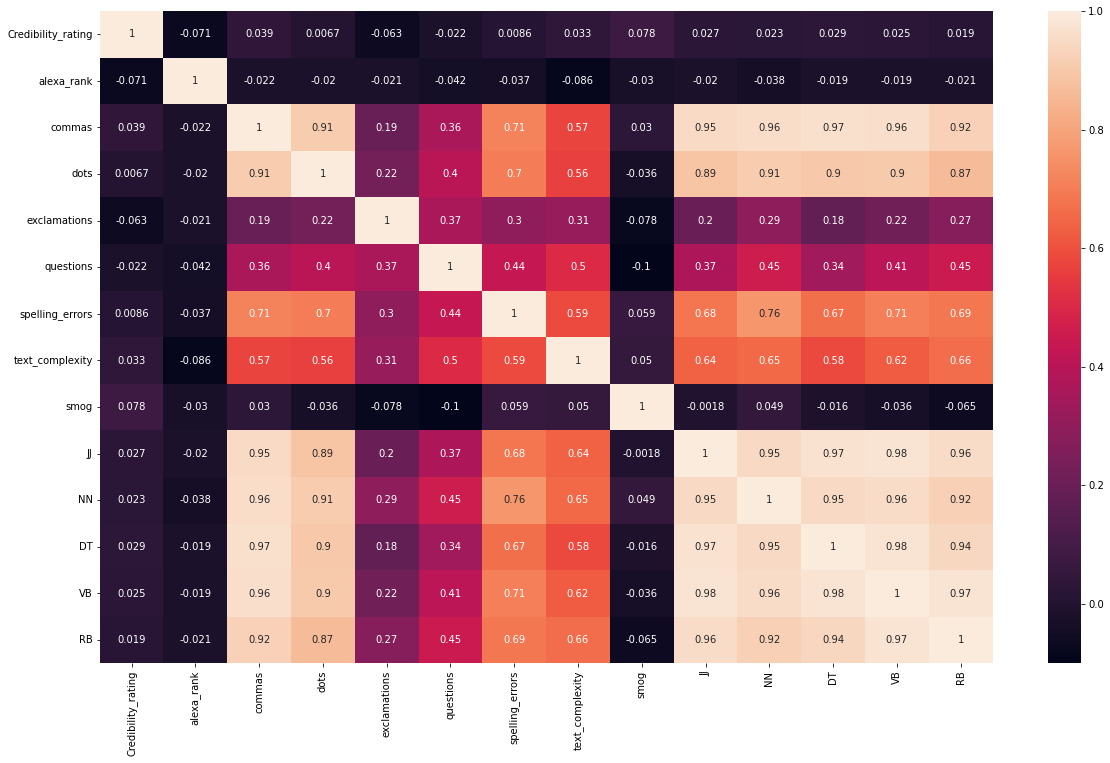

In [18]:
plt.figure(figsize=(20,12))
sns.heatmap(df_plot1.corr(),annot=True)
plt.show()

In [19]:
df_main.describe()

Credibility_rating    alexa_rank       commas         dots  \
count         5691.000000  5.680000e+03  5687.000000  5691.000000   
mean             4.054622  1.864592e+06    41.102690    45.853804   
std              0.829059  4.215360e+06   138.767852   146.926136   
min              1.000000 -1.000000e+00     0.000000     0.000000   
25%              3.500000  3.930000e+03     8.000000    11.000000   
50%              4.200000  1.269820e+05    19.000000    23.000000   
75%              4.585714  1.436036e+06    42.000000    46.000000   
max              5.000000  3.081823e+07  6620.000000  5982.000000   

       exclamations    questions  spelling_errors  text_complexity  \
count   5687.000000  5687.000000      5687.000000      5687.000000   
mean       1.716547     2.405662        57.767364         3.930929   
std        8.771507     6.899116       154.338128         1.382503   
min        0.000000     0.000000         0.000000         0.000000   
25%        0.000000     0.000000         9.000000         2.994558   
50%        0.000000     0.000000        22.000000         3.743809   
75%        1.000000     2.000000        55.000000         4.583133   
max      465.000000   195.000000      5525.000000        21.263883   

              smog           JJ            NN            DT            VB  \
count  5450.000000  5419.000000   5439.000000   5407.000000   5423.000000   
mean     13.882472    58.256136    362.196360     69.696689    108.442375   
std       5.208426   159.914509    963.464985    233.523205    323.019480   
min       3.129100     1.000000      6.000000      1.000000      1.000000   
25%      11.208143    14.000000     89.000000     16.000000     25.000000   
50%      13.023867    30.000000    182.000000     34.000000     54.000000   
75%      15.903189    61.000000    359.000000     70.000000    113.000000   
max      97.346125  7948.000000  44553.000000  12268.000000  15122.000000   

                RB  
count  5235.000000  
mean     30.529513  
std      82.923343  
min       1.000000  
25%       6.000000  
50%      14.000000  
75%      32.000000  
max    3536.000000

In [20]:
df_main.describe(include='O')

document_url_y
count            5691
unique             32
top               com
freq             3778

In [21]:
#df_main['category'].value_counts()

In [22]:
df_main['document_url_y'].nunique()

32

In [23]:
array = ['com', 'org', 'gov', 'edu','net','uk','au','ca','in']
df2 = df_main.loc[df_main['document_url_y'].isin(array)]
df2.shape

(5565, 15)

In [24]:
df2.describe(include='O')

document_url_y
count            5565
unique              9
top               com
freq             3778

In [25]:
### Handling NULLs

In [26]:
df2.isna().sum()/df2.shape[0]*100

Credibility_rating    0.000000
alexa_rank            0.197664
commas                0.071878
dots                  0.000000
exclamations          0.071878
questions             0.071878
spelling_errors       0.071878
text_complexity       0.071878
smog                  4.330638
JJ                    4.851752
NN                    4.528302
DT                    5.031447
VB                    4.815813
RB                    8.068284
document_url_y        0.000000
dtype: float64

In [27]:
## Dropping the missing values.
#df2.dropna(inplace=True)
df2=df2.fillna(0)

In [28]:
df2.isna().sum()/df2.shape[0]*100

Credibility_rating    0.0
alexa_rank            0.0
commas                0.0
dots                  0.0
exclamations          0.0
questions             0.0
spelling_errors       0.0
text_complexity       0.0
smog                  0.0
JJ                    0.0
NN                    0.0
DT                    0.0
VB                    0.0
RB                    0.0
document_url_y        0.0
dtype: float64

### One Hot Encoding

In [57]:
## dummy encode the categorical variable.
from sklearn import preprocessing
ohe=preprocessing.OneHotEncoder()
df1=ohe.fit_transform(df2)
df1 = pd.get_dummies(df2,drop_first=True)
df1.shape


ValueError: all arrays must be same length

In [58]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df2.document_url_y = le.fit_transform(df2.document_url_y)
df1=df2
df1

Credibility_rating  alexa_rank  commas    dots  exclamations  questions  \
0               3.714286      6137.0   101.0   114.0           1.0        0.0   
1               4.428571      2661.0    15.0    23.0           0.0        0.0   
2               4.000000    809409.0    19.0    18.0           0.0        1.0   
3               4.833333      2549.0    19.0    20.0           0.0        0.0   
4               3.888889       132.0    19.0    17.0           0.0        0.0   
5               3.875000    564474.0   112.0   157.0           0.0        4.0   
6               2.750000    117184.0    46.0    45.0           0.0        0.0   
7               4.250000      8385.0    28.0    34.0           8.0        0.0   
8               4.428571     52447.0    22.0    26.0           0.0        2.0   
9               3.400000   1347945.0    25.0    37.0           1.0        1.0   
10              3.600000     44226.0     3.0     3.0           4.0        0.0   
11              4.800000       148.0   117.0   120.0           0.0        2.0   
12              4.333333       236.0    47.0    24.0           0.0        1.0   
13              3.000000         9.0    29.0   150.0           4.0        6.0   
14              3.800000     31496.0     2.0     1.0           1.0        0.0   
15              3.750000    278471.0    34.0    16.0           1.0        4.0   
16              4.571429         4.0    36.0    17.0           0.0        0.0   
17              4.571429       353.0    23.0    22.0           0.0        5.0   
18              4.166667   1150480.0    86.0    77.0           0.0        5.0   
19              4.800000    969742.0   101.0    97.0           0.0        1.0   
20              4.833333       334.0   117.0   117.0           0.0        3.0   
21              4.571429      1260.0    30.0    27.0           0.0        1.0   
22              4.818182     35239.0    11.0    20.0           0.0        0.0   
23              3.000000   1185758.0    11.0    19.0           0.0        0.0   
24              3.400000    195098.0    17.0    15.0           0.0        0.0   
25              4.000000        65.0    20.0    16.0           0.0        1.0   
26              4.333333     15288.0    73.0   135.0          11.0        8.0   
27              1.833333   1153911.0    19.0    19.0           0.0        0.0   
28              4.324324    113761.0     6.0    13.0           0.0        2.0   
29              4.333333    431538.0    38.0    88.0           0.0        4.0   
30              4.500000    995054.0     6.0    10.0           3.0        2.0   
31              4.400000         4.0    57.0    32.0           0.0        1.0   
32              4.142857    148663.0   169.0   173.0           0.0        0.0   
33              3.800000    482424.0    13.0    10.0           0.0        0.0   
34              3.600000       957.0    13.0     9.0           0.0        2.0   
35              4.857143     23859.0    15.0    17.0           0.0        0.0   
36              3.750000      7305.0     5.0    45.0           5.0        2.0   
37              4.707317         5.0    49.0    43.0           0.0        0.0   
38              4.333333   3187937.0     8.0     7.0           5.0        0.0   
39              4.400000       294.0    23.0    32.0           0.0        4.0   
40              4.833333       330.0    31.0    43.0           0.0        1.0   
41              4.000000      1391.0    23.0    12.0           0.0        0.0   
42              4.500000       334.0    38.0    43.0           0.0        0.0   
43              4.800000     68258.0    40.0    27.0           0.0        0.0   
44              3.666667    138781.0    42.0    32.0           0.0        0.0   
45              4.500000      1173.0     9.0    10.0           0.0        0.0   
46              4.000000   1405294.0    21.0    16.0           0.0        0.0   
47              4.400000    342849.0     9.0    16.0           0.0        4.0   
48              4.555556       352.0 

In [59]:
import pickle
with open("../models/le.pkl",'wb') as file:
    pickle.dump(le,file)
file.close()

### Splitting the dataset

In [60]:
y = df1["Credibility_rating"]
X = df1.drop("Credibility_rating",axis=1)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### Scaling the dataset

In [61]:
X_train.head()

alexa_rank  commas  dots  exclamations  questions  spelling_errors  \
3945     14375.0    12.0   7.0           1.0        1.0             12.0   
3871    408360.0    65.0  67.0           0.0       11.0             65.0   
3797         4.0    20.0  24.0           0.0        0.0             29.0   
2293    614404.0    71.0  60.0           0.0       14.0             90.0   
3712   3155342.0     1.0   3.0           0.0        0.0              4.0   

      text_complexity       smog    JJ      NN     DT     VB    RB  \
3945         2.763902  11.208143   7.0    70.0   13.0   28.0   8.0   
3871         5.610996  11.208143  65.0   503.0  145.0  195.0  33.0   
3797         3.288435  13.023867  21.0   144.0   27.0   58.0  10.0   
2293         5.362339  17.122413  83.0  1019.0   65.0   92.0  33.0   
3712         2.498577  13.023867   4.0    60.0    5.0    6.0   2.0   

      document_url_y  
3945               7  
3871               7  
3797               2  
2293               7  
3712               2

In [62]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
with open("../models/standardscaler.pkl",'wb') as file:
    pickle.dump(sc,file)
file.close()

### PCA

In [64]:
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Covariance Matrix 
%s [[ 1.00025681 -0.01773596 -0.01766338 -0.01979234 -0.0368277  -0.02832688
  -0.08505954  0.00511176 -0.01039321 -0.02712887 -0.01156053 -0.01289133
  -0.01275317 -0.02519408]
 [-0.01773596  1.00025681  0.89917113  0.25709713  0.40201805  0.73859261
   0.55566664  0.01940118  0.94142352  0.94988316  0.95682895  0.95624445
   0.91947295  0.03029346]
 [-0.01766338  0.89917113  1.00025681  0.29765586  0.4447616   0.72419469
   0.5365469  -0.0379816   0.8725232   0.88915543  0.87948088  0.88736918
   0.85630362  0.03398304]
 [-0.01979234  0.25709713  0.29765586  1.00025681  0.4998978   0.32952069
   0.39725828 -0.07304757  0.29338795  0.35067276  0.2446168   0.30851778
   0.38680422 -0.05531747]
 [-0.0368277   0.40201805  0.4447616   0.4998978   1.00025681  0.48493555
   0.5553102  -0.09597542  0.3788144   0.44786507  0.33946877  0.41054092
   0.44749535 -0.05455149]
 [-0.02832688  0.73859261  0.72419469  0.32952069  0.48493555  1.00025681
   0.58335578  0.03086684  0.

In [65]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 57.03175433  66.94077115  74.5401283   81.52352556  88.04383283
  92.14499143  95.11412009  97.75116818  98.88326947  99.34155076
  99.65230107  99.82374207  99.94555157 100.        ]


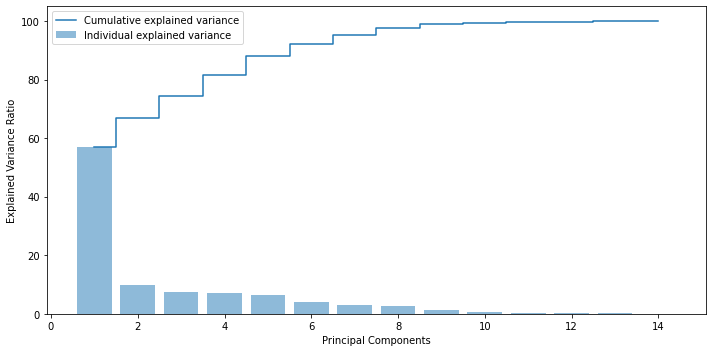

In [66]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [67]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = len(X.columns))
 
X_train_pc = pca.fit_transform(X_train)
X_test_pc = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

### Random Forest model

In [68]:
rf =RandomForestRegressor()
rf_model = rf.fit(X_train,y_train)

In [69]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
print('\n')
print('train r2_score:',r2_score(y_train,y_train_pred),',','test r2_score:',r2_score(y_test,y_test_pred))
print('\n')
print('train MSE:',mean_squared_error(y_train,y_train_pred),',','test MSE:',mean_squared_error(y_test,y_test_pred))



train r2_score: 0.879941078713421 , test r2_score: 0.14514761816781396


train MSE: 0.08120168800668913 , test MSE: 0.5592491615845925


Text(0.5, 1.0, 'Feature Importance')

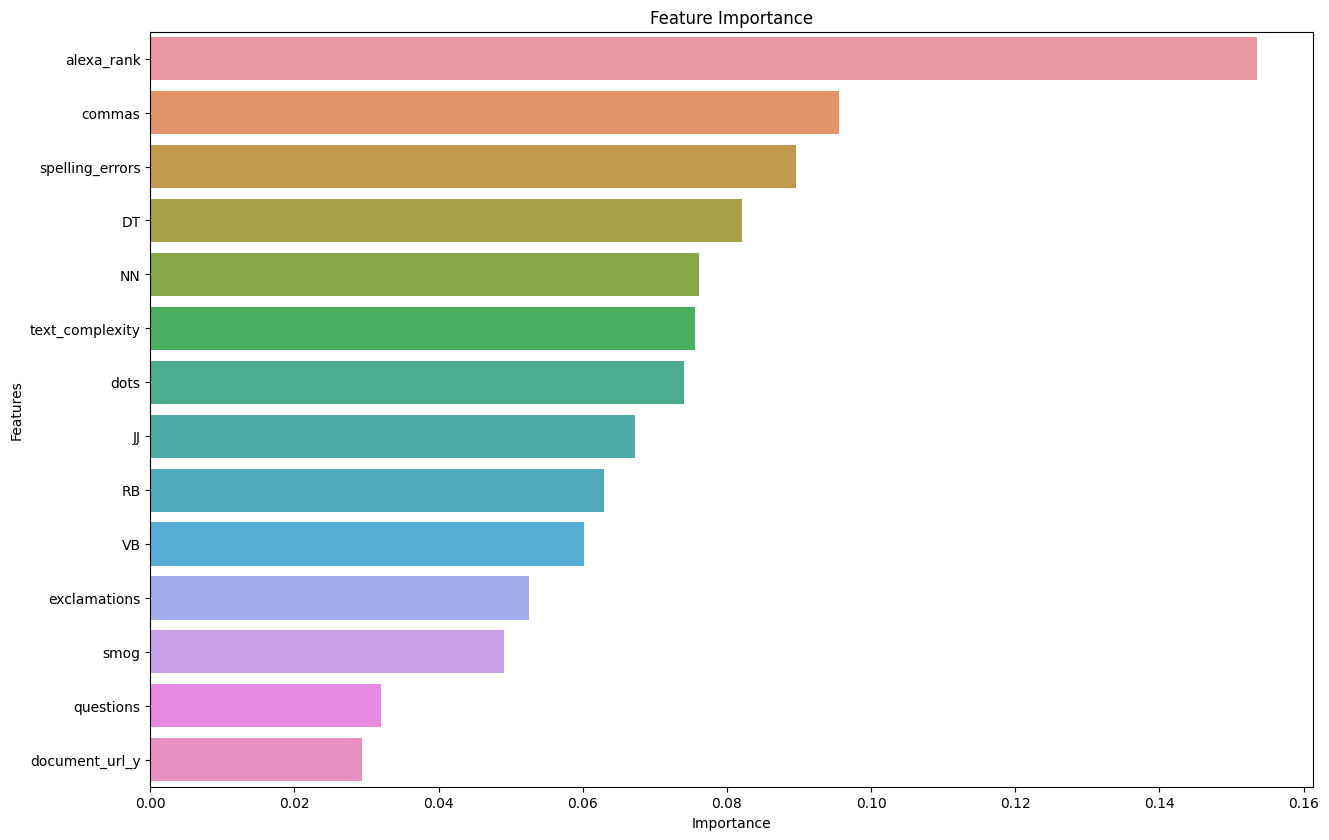

In [70]:
FI_df=pd.DataFrame({'Features': X.columns, 'Importance': rf.feature_importances_})
FI_df=FI_df.sort_values(by='Importance', ascending=False).head(100)

#plot feature importance
plt.figure(figsize=(15,10),dpi=100)
sns.barplot(x=FI_df[:30].Importance,y=FI_df[:30].Features,orient = 'h').set_title('Feature Importance')

In [71]:
rf =RandomForestRegressor()
rf_model = rf.fit(X_train_pc,y_train)

rf_predict_train = rf_model.predict(X_train_pc)
rf_predict_test = rf_model.predict(X_test_pc)
print('\n')
print('train r2_score:',r2_score(y_train,rf_predict_train),',','test r2_score:',r2_score(y_test,rf_predict_test))
print('\n')
print('train MSE:',mean_squared_error(y_train,rf_predict_train),',','test MSE:',mean_squared_error(y_test,rf_predict_test))



train r2_score: 0.8718920109172322 , test r2_score: 0.07540908370899468


train MSE: 0.08664566405550496 , test MSE: 0.6048724969757185


In [72]:
rf.feature_importances_

array([0.05540625, 0.07878702, 0.07176788, 0.08375846, 0.0692169 ,
       0.08516824, 0.05108315, 0.06840051, 0.07835653, 0.08305593,
       0.07210316, 0.06494188, 0.07355543, 0.06439867])

Text(0.5, 1.0, 'Feature Importance')

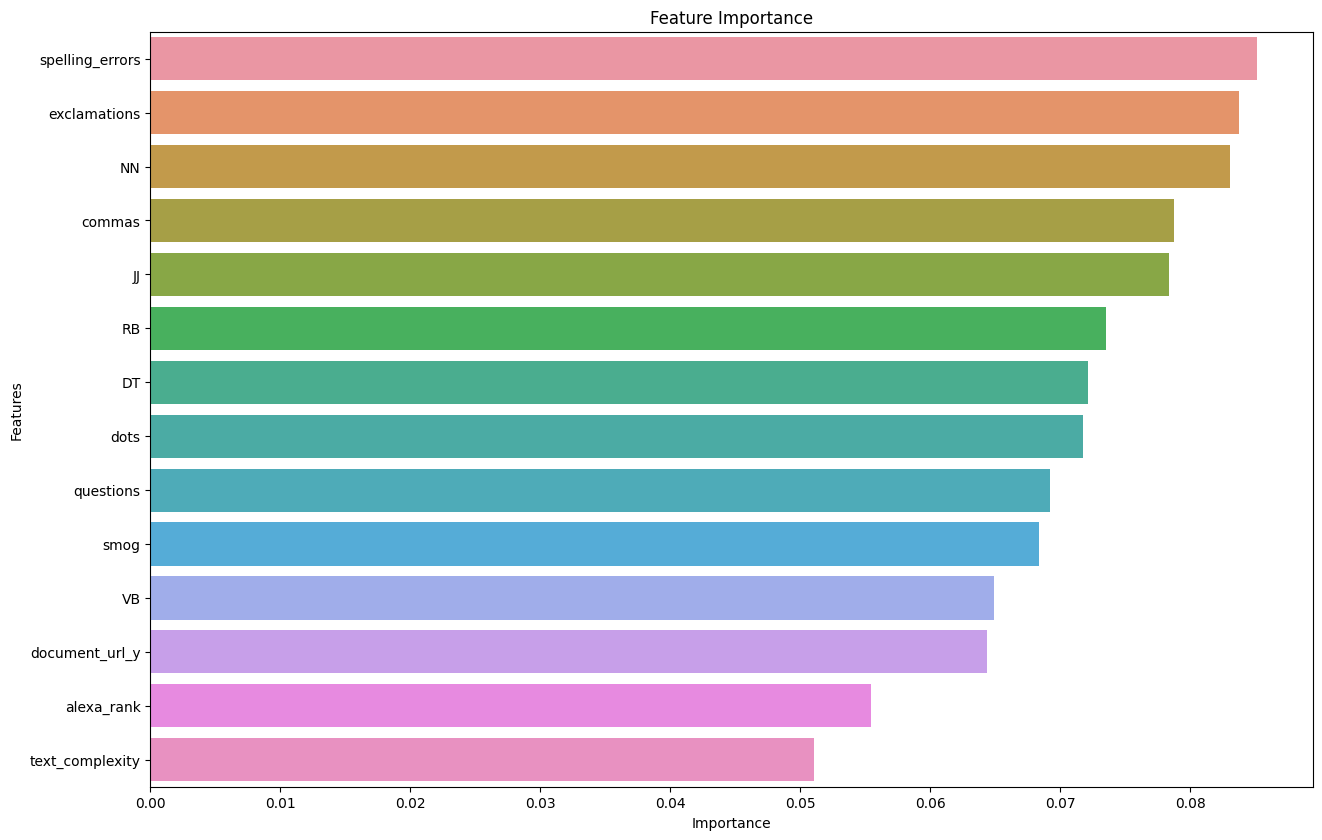

In [73]:
FI_df=pd.DataFrame({'Features': X.columns, 'Importance': rf.feature_importances_})
FI_df=FI_df.sort_values(by='Importance', ascending=False).head(100)

#plot feature importance
plt.figure(figsize=(15,10),dpi=100)
sns.barplot(x=FI_df[:30].Importance,y=FI_df[:30].Features,orient = 'h').set_title('Feature Importance')

In [74]:
FI_df.head(5)

Features  Importance
5  spelling_errors    0.085168
3     exclamations    0.083758
9               NN    0.083056
1           commas    0.078787
8               JJ    0.078357

In [75]:
import pickle
with open("../models/rf_credibility_model.pkl",'wb') as file:
    pickle.dump(rf_model,file)
file.close()

In [1]:
#            0
# 0          1
# 1          0
# 2          2
# 3          1
# 4        104
# 5   1.937519
# 6        3.0
# 7         55
# 8          1
# 9          2
# 10         0
# 11         0
# 12         4
# 13       com

feature_list = [{
        'commas':1, 'exclamations':0, 'dots':2, 'questions':1,
        'spelling_errors':104, 'text_complexity':1.937519, 'smog':3.0,
        'NN':55, 'VB':1, 'JJ':2, 'RB':0, 'DT':0, 'alexa_rank':4, 'document_url_y':"com"
    }]

In [78]:
df=pd.DataFrame(feature_list)
df

commas  exclamations  dots  questions  spelling_errors  text_complexity  \
0       1             0     2          1              104         1.937519   

   smog  NN  VB  JJ  RB  DT  alexa_rank document_url_y  
0   3.0  55   1   2   0   0           4            com

In [80]:
def preprocess(X):
    #array = ['com', 'org', 'gov', 'edu','net','uk','au','ca','in']
    #df2 = df_main.loc[df_main['document_url_y'].isin(array)]

    X=X.fillna(0)
    ## dummy encode the categorical variable.
    le= pickle.load(open("../models/le.pkl","rb"))
    X.document_url_y = le.transform(X.document_url_y)
    sc = pickle.load(open("../models/standardscaler.pkl","rb"))
    X= sc.transform(X)
    return X


In [81]:
preprocess(df)

array([[-0.44084038, -0.27064804, -0.27715981, -0.10015763, 15.1768093 ,
        -0.34333381, -0.68489334,  7.0077399 , -0.31811828, -0.33225582,
        -0.2627493 , -0.29552919, -0.27866977, -0.56276604]])

In [82]:
rf_model.predict(preprocess(df))

array([3.78258824])